In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
real_names = {"tweets_c_500" : "Tweets #Clusters = 500", "tweets_c_50" : "Tweets #Clusters = 50", 
              "tweets_c_100" : "Tweets #Clusters = 100", "tweets_c_250" : "Tweets #Clusters = 250", 
              "tweets_c_40" : "Tweets #Clusters = 40", "tweets_c_80" : "Tweets #Clusters = 80",
              "tweets_c_200" : "Tweets #Clusters = 200",
              "tweets_10000" : "Tweets, 10000 entries", "tweets_20000" : "Tweets, 20000 entries", 
              "tweets_10000_c_62" : "Tweets, 10000 entries", "tweets_2500_c_16" : "Tweets, 2500 entries", 
              "tweets_5000_c_31" : "Tweets, 5000 entries", "tweets_20000_c_125" : "Tweets, 20000 entries",
            }

vary_n = [2, 4, 8, 32, 64, 128, 256]
for n in vary_n:
    real_names[f"tweets_c_250_"+str(n)] = f"Table #Cluster 250, Limit {n}"
    real_names[f"tweets_"+str(n)] = f"Table (Without Index) #Cluster 250, Limit {n}"

In [7]:
def plot_speedup(dir, comparisons, name="result", time_file="ALL_TIMINGS.csv", savefig="speedup"):
    df = pd.read_csv(f"{dir}/{time_file}", header=None)
    print(df)
    speedups = []
    for table in comparisons:
        base = int(df[df[0]==comparisons[table]][1].iloc[0])
        comp = int(df[df[0]==table][1].iloc[0])
        speedups.append({'table': real_names[table], 'speedup' : base/comp})

    result = pd.DataFrame(speedups)

    ax = result.plot(kind='bar', x='table', y='speedup', legend=False, color='none', edgecolor='black')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())) + "x", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(p.get_x(), 5), textcoords='offset points')
    plt.title(name)
    plt.xlabel('Table')
    plt.ylabel('Speedup')
    plt.savefig(f'{dir}/{savefig}.png')
    plt.show()
            

              0     1
0        tweets  8712
1   tweets_c_40    78
2   tweets_c_80    79
3  tweets_c_100    79
4  tweets_c_200    34


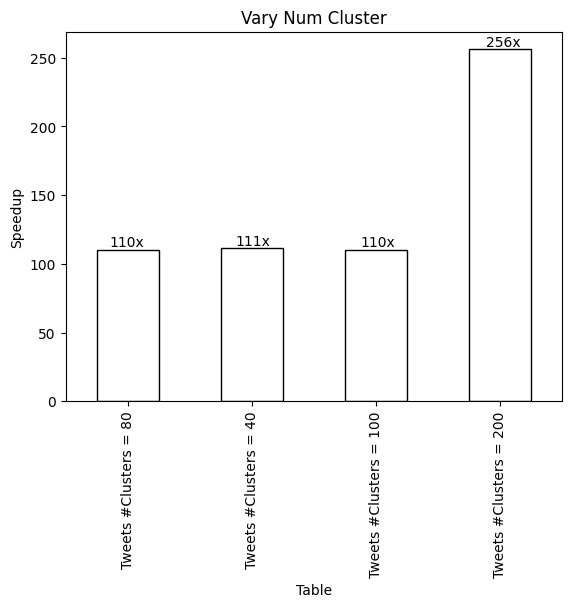

In [10]:
# plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_num_cluster", 
#              {"tweets_c_500" : "tweets",
#               "tweets_c_250" : "tweets",
#               "tweets_c_50" : "tweets",
#               "tweets_c_100" : "tweets",}, 
#                name = "Vary Num Cluster",)

plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_num_cluster", 
             {"tweets_c_80" : "tweets",
              "tweets_c_40" : "tweets",
              "tweets_c_100" : "tweets",
              "tweets_c_200" : "tweets",}, 
              time_file = "times.csv",
              name = "Vary Num Cluster", 
              savefig="new")

In [63]:
def plot_accuracy(dir, comparisons, name="result"):
    
    percentages = []
    for table in comparisons:     
        files = [filename for filename in os.listdir(dir) if filename.startswith(table + "_")]
        percentage_local = []
        for file in files:
            print(f"{dir}/{file.replace(table, comparisons[table])}.csv")
            print(f"{dir}/{file}")
            with open(f"{dir}/{file.replace(table, comparisons[table])}", 'r') as f:
                base_lines_data = f.readlines()
            with open(f"{dir}/{file}", 'r') as f:
                table_file = f.readlines()
            intersection = set(base_lines_data) & set(table_file)
            percentage_local.append((len(intersection) / min(len(base_lines_data), len(table_file))) * 100)
        percentages.append({'table': real_names[table], 'overlap' : sum(percentage_local)/ len(percentage_local)})
    print(percentages)

    result = pd.DataFrame(percentages)
    ax = result.plot(kind='bar', x='table', y='overlap', legend=False, color='none', edgecolor='black')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())) + "%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(p.get_x(), 5), textcoords='offset points')
    plt.title(name)
    plt.xlabel('Table')
    plt.ylabel('Accuracy (%)')
    plt.savefig(f'{dir}/accuracy.png')
    plt.show()

./benchmark_results/var_probe/tweets_1_1.csv.csv
./benchmark_results/var_probe/tweets_c_250_1_1.csv
./benchmark_results/var_probe/tweets_1_0.csv.csv
./benchmark_results/var_probe/tweets_c_250_1_0.csv
./benchmark_results/var_probe/tweets_1_2.csv.csv
./benchmark_results/var_probe/tweets_c_250_1_2.csv
./benchmark_results/var_probe/tweets_2_0.csv.csv
./benchmark_results/var_probe/tweets_c_250_2_0.csv
./benchmark_results/var_probe/tweets_2_1.csv.csv
./benchmark_results/var_probe/tweets_c_250_2_1.csv
./benchmark_results/var_probe/tweets_2_2.csv.csv
./benchmark_results/var_probe/tweets_c_250_2_2.csv
./benchmark_results/var_probe/tweets_3_2.csv.csv
./benchmark_results/var_probe/tweets_c_250_3_2.csv
./benchmark_results/var_probe/tweets_3_0.csv.csv
./benchmark_results/var_probe/tweets_c_250_3_0.csv
./benchmark_results/var_probe/tweets_3_1.csv.csv
./benchmark_results/var_probe/tweets_c_250_3_1.csv
./benchmark_results/var_probe/tweets_4_0.csv.csv
./benchmark_results/var_probe/tweets_c_250_4_0.csv


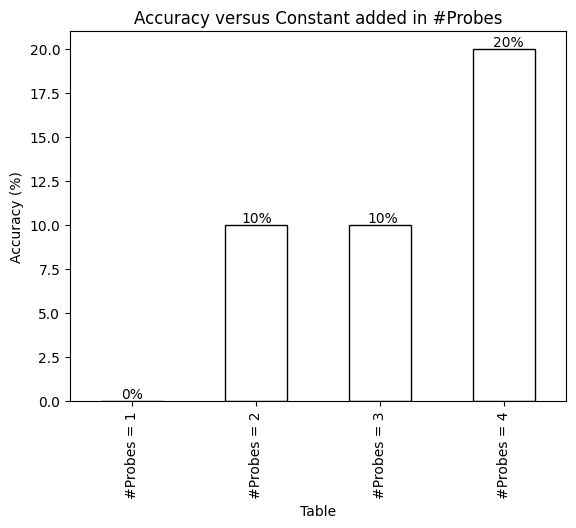

In [64]:
# comps = {}
# for num in [2, 4, 8, 32, 64, 128, 256]:
#     comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

# plot_accuracy("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_n", 
#                comps,
#                name = "Accuracy versus Limit #",)

# Run after other wise it will be conflict with limit
vary_probes = [i for i in range(1, 5)]
for n in vary_probes:
    real_names[f"tweets_c_250_"+str(n)] = f"#Probes = {n}"
    real_names[f"tweets_"+str(n)] = f"Table (Without Index) #Probes = {n}"

comps = {}
for num in vary_probes:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_accuracy("./benchmark_results/var_probe", 
               comps,
               name = "Accuracy versus Constant added in #Probes",)

                   0     1
0           tweets_2  8088
1           tweets_4  8161
2           tweets_8  7928
3          tweets_32  7806
4          tweets_64  8077
5         tweets_128  7806
6         tweets_256  7788
7     tweets_c_250_2    15
8     tweets_c_250_4    14
9     tweets_c_250_8    13
10   tweets_c_250_32    14
11   tweets_c_250_64    14
12  tweets_c_250_128    13
13  tweets_c_250_256    15


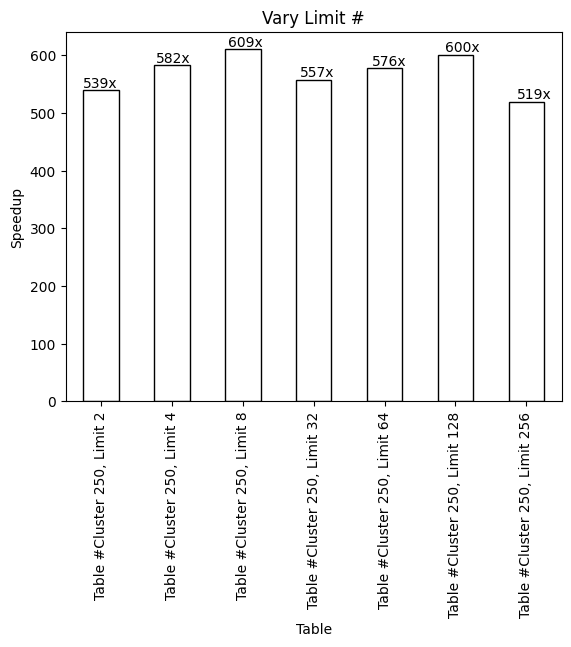

In [22]:
comps = {}
for num in [2, 4, 8, 32, 64, 128, 256]:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_n", 
               comps,
               name = "Vary Limit #",)

                    0     1
0              tweets  8253
1         tweets_2500   472
2         tweets_5000   960
3        tweets_10000  1911
4        tweets_20000  3909
5        tweets_c_250    17
6    tweets_2500_c_16    87
7    tweets_5000_c_31    50
8   tweets_10000_c_62    30
9  tweets_20000_c_125    51


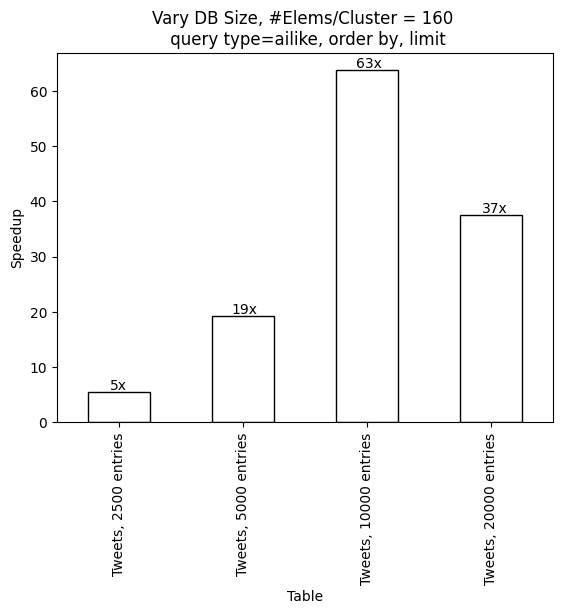

In [23]:
plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_db_size", 
             {"tweets_2500_c_16" : "tweets_2500",
              "tweets_5000_c_31" : "tweets_5000",
              "tweets_10000_c_62" : "tweets_10000",
              "tweets_20000_c_125" : "tweets_10000",}, 
               name = "Vary DB Size, #Elems/Cluster = 160 \n query type=ailike, order by, limit",)

                    0     1
0              tweets  4764
1         tweets_2500   280
2         tweets_5000   565
3        tweets_10000  1129
4        tweets_20000  2654
5        tweets_c_250    22
6    tweets_2500_c_16    21
7    tweets_5000_c_31     4
8   tweets_10000_c_62     6
9  tweets_20000_c_125     8


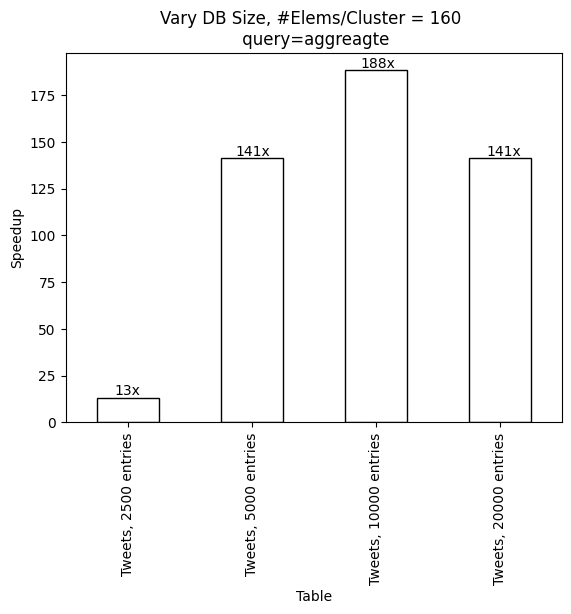

In [24]:
plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_agg_query", 
             {"tweets_2500_c_16" : "tweets_2500",
              "tweets_5000_c_31" : "tweets_5000",
              "tweets_10000_c_62" : "tweets_10000",
              "tweets_20000_c_125" : "tweets_10000",}, 
               name = "Vary DB Size, #Elems/Cluster = 160 \n query=aggreagte")

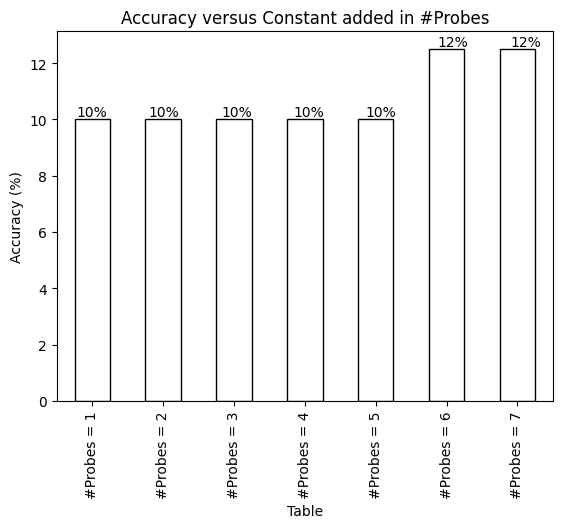

In [29]:

# Run after other wise it will be conflict with limit
vary_probes = [i for i in range(1, 8)]
for n in vary_probes:
    real_names[f"tweets_c_250_"+str(n)] = f"#Probes = {n}"
    real_names[f"tweets_"+str(n)] = f"Table (Without Index) #Probes = {n}"

comps = {}
for num in vary_probes:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_accuracy("./var_probe", 
               comps,
               name = "Accuracy versus Constant added in #Probes",)